[Course Link](https://www.kaggle.com/learn/machine-learning-explainability)

# Use Cases for Model Insights

## Questions that this course will try to answer

This course will give you technical skills to answer the following questions:
1. What features in the data did the model think are most important?
2. For any single prediction from a model, how did each feature in the data affect that particular prediction?
3. How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?

## Why are these insights valuable:

**1. Debugging :**

Given the frequency and potentially disastrous consequences of bugs, debugging is one of the most valuable skills in data science. Understanding the patterns a model is finding will help you identify when those are at odds with your knowledge of the real world, and this is typically the first step in tracking down bugs.

**2. Informing Feature Engineering:**

Feature engineering is usually the most effective way to improve model accuracy. Feature engineering usually involves repeatedly creating new features using transformations of your raw data or features you have previously created. Sometimes you can go through this process using nothing but intuition about the underlying topic. But you'll need more direction when you have 100s of raw features or when you lack background knowledge about the topic you are working on. You will understand whether a feature is important for a given problem, and with that one can create new features based on that importance

**3. Directing Future Data Collection:**

Sometimes collecting new types of data is mandatory for a given problem but indispensable. This process can be expensive or inconvenient, so one must do it if one knows it will be worthwhile. Model-based insights give one a good understanding of the value of features one currenlty has, which will help to reason about what new values may be most helpful.

**4. Informing Human Decision-Making:**

There are some decisions that are made by human, and insights about the model decision can be more valuable than predictions.

**5. Building Trust:**

In practice, showing insights that fir their general understanding of the problem will help build trust, even among people with little deep knowledge of data science.

# Permutation Importance

With permutation importance we will try to answer the following question:
- **What features have the biggest impact on predictions?**

- This process is called **feature importance**. There are multiple ways to calculate it, but here we are going to focus on permutation importance, because:
1. fast to calculate;
2. widely used and understood;
3. consistent with properties we would want a feature importance to have.


### How it works?

- Is calculated after a model has been fitted.
- We will ask the following question:
    - If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?



- Steps:
    1. Get a trained model.
    2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
    3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.


- Results Interpretation:
    1. When we shuffle a column that the model relies on heavily for predictions -> the shuffled dataset will have worse predictions, making this feature more important;
    2. When we shuffle a column that the model do not rely on -> then the shuffled dataset will have closer predictions to the real ones. Making this feature not that important;
    3. When the score on the permuted dataset is higher then on normal - its a clear sign to remve the feature and retrain the model;

**Representation of the permutation process**
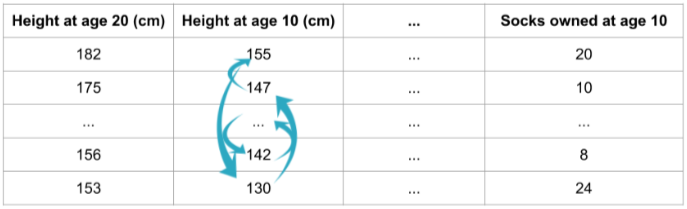
   
Basically it shows the drop in the score if the feature would be replaced with randomly permuted values.


### Problem [[source]](https://towardsdatascience.com/stop-permuting-features-c1412e31b63f)
- Using permutation can lead to an **overestimate importance of correlated features** - [paper](https://arxiv.org/abs/1905.03151)

Possible explanation for this is the model's extrapolation. Suppose, the model was trained using two highly positively-correlated features x1 and x2 (left plot on the illustration below). To calculate the importance of feature x1, we shuffle the feature and make predictions for a “shuffled” points (red points on the center plot). But the model hasn’t seen any training examples of x1 in the left upper corner and right bottom corner. Thus, to make predictions, it must extrapolate to previously unseen regions (right plot). All models extrapolate badly, thus making unexpected predictions. These “points from new regions” strongly affect the final score and hence, permutation importance.

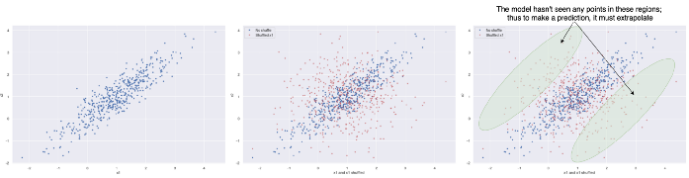

#### Alternatives:

1. **Conditional Variable Importance** - permute features conditional, based on the values of remaining features to avoid “unseen regions”
2. **Dropped Variable Importance** - equivalent to the leave-one-covariate-out methods : drop feature, retrain model, compare scores.
3. **Permute-and-Relearn Importance** - permute feature, retrain model, compare scores

[Github Repo](https://github.com/DenisVorotyntsev/StopPermutingFeatures) that compare those methods 

**Conclusion of medium paper:**

- Don't use permutation importance for tree-based models interpretation (or any model which interpolates in unseen regions badly)
- Use SHAP values or built-in gain importance instead;
- Don't use "permute-and-relearn" or "drop-and-relearn" approaches for finding important features

# Partial Plots

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

This is useful to answer questions like:

- Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas?

- Are predicted health differences between two groups due to differences in their diets, or due to some other factor?

If you are familiar with linear or logistic regression models, partial dependence plots can be interpreted similarly to the coefficients in those models. Though, partial dependence plots on sophisticated models can capture more complex patterns than coefficients from simple models. 

### How it works

- Partial dependence plots are calculated after a model has been fit;
- Imagine that we where dealing with a basketball game data, where the goal is to predict whether a team is going to win the game or not. First we train our model, without aritificially manipulate the data. Then if we want to find out how a feature (e.g. #games won) impacts the predictions PDC does the following:
    1. Sets to 0 (minimum value of #game won feature) every entry of that feature;
    2. Calculates the prediction with that artificially manipulated dataset;
    3. Take the average of that predicted probability;
    4. That average predicted probability to win the next game if we have 0 #games won;
    5. And we plot that value;
    6. Then we repeat step 1 -> 5 till the maximum value of #game won feature.
    
**Disadvantages**
- Assumes that your features are independent -> e.g. `#games won` and `#games lost` are dependent to each other, by setting one to 0 for instance and doing nothing to the other feature we are creating inconsistency and a dataframe that do not correspond to reality.

Understand better Partial Dependence Plots with this [video](https://www.youtube.com/watch?v=uQQa3wQgG_s)

# SHAP Values

You've seen (and used) techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this?

- A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
- A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions.

### How it works?

- SHAP value interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In these tutorials, we predicted whether a team would have a player win the Man of the Match award.

We could ask:

- How much was a prediction driven by the fact that the team scored 3 goals?

But it's easier to give a concrete, numeric answer if we restate this as:

- How much was a prediction driven by the fact that the team scored 3 goals, **instead of some baseline number of goals.**

Of course, each team has many features. So if we answer this question for number of goals, we could repeat the process for all other features.

SHAP values do this in a way that guarantees a nice property. Specifically, you decompose a prediction with the following equation:

``sum(SHAP values for all features) = pred_for_team - pred_for_baseline_values``

That is, the SHAP values of all features sum up to explain why my prediction was different from the baseline. This allows us to decompose a prediction in a graph like this:

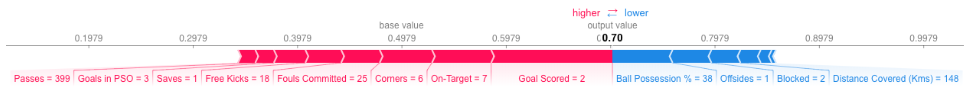


#### How do you interpret this?

We predicted 0.7, whereas the base_value is 0.4979. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Goal Scored being 2. Though the ball possession value has a meaningful effect decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

There is some complexity to the technique, to ensure that the baseline plus the sum of individual effects adds up to the prediction (which isn't as straightforward as it sounds). We won't go into that detail here, since it isn't critical for using the technique. This [blog post](https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d) has a longer theoretical explanation.

# Advanced Uses of SHAP Values

Now we'll expand on SHAP values, seeing how aggregating many SHAP values can give more detailed alternatives to permutation importance and partial dependence plots.

### Summary Plots

Permutation importance is great because it created simple numeric measures to see which features mattered to a model. This helped us make comparisons between features easily, and you can present the resulting graphs to non-technical audiences.

But it doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has
- a large effect for a few predictions, but no effect in general, or
- a medium effect for all predictions.

SHAP summary plots give us a birds-eye view of feature importance and what is driving it. We'll walk through an example plot for the soccer data:

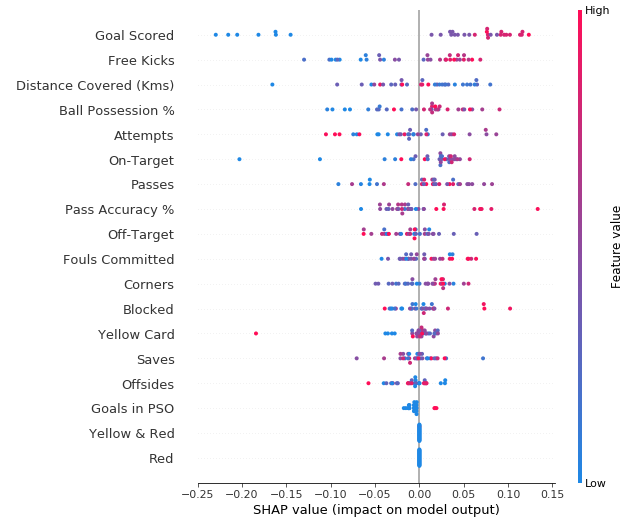

This plot is made of many dots, and each has three characteristics:
1. Vertical location shows what feature it is depicting;
2. Color shows whether that feature was high or low for that row of the dataset;
3. Horizontal location shows whether the effect of that value caused a higher or lower prediction;

E.g. the point in the upper left was for a team that scored few goals, reducing the prediction by 0.25

**One can easily check that:**
1. `Red` and `Yellow & Red` were ignored by the model;
2. Usually `Yellow Card` does not affect the prediction, but there is an extreme case where a **high value** caused a much lower prediction;
3. High values of `Goal Scored` caused higher predictions, and low values caused low predictions;

### SHAP Dependence Contribution Plots

We've previously used Partial Dependence Plots to show how a single feature impacts predictions. These are insightful and relevant for many real-world use cases. Plus, with a little effort, they can be explained to a non-technical audience.


But there's a lot they don't show. For instance, what is the distribution of effects? Is the effect of having a certain value pretty constant, or does it vary a lot depending on the values of other feaures. SHAP dependence contribution plots provide a similar insight to PDP's, but they add a lot more detail.

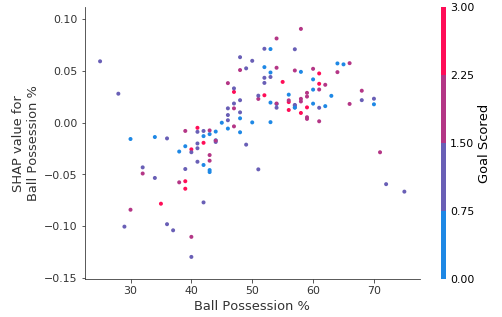

- The fact this slopes upward says that the more you possess the ball, the higher the model's prediction is for winning the Man of the Match award.


The spread suggests that other features must interact with Ball Possession %. For example, here we have highlighted two points with similar ball possession values. That value caused one prediction to increase, and it caused the other prediction to decrease. 

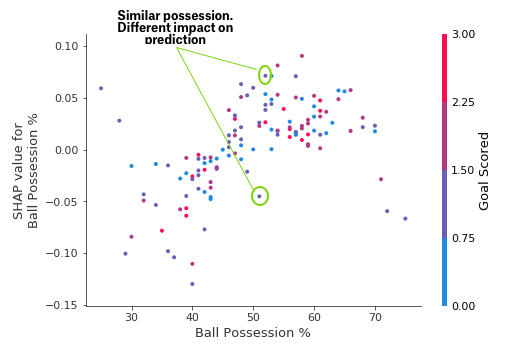

For comparison, a simple linear regression would produce plots that are perfect lines, without this spread.

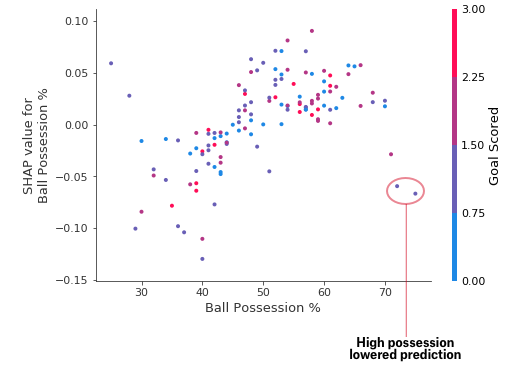

Conclusion for these last two points is: **In general, having the ball increases a team's chance of having their player win the award. But if they only score one goal, that trend reverses and the award judges may penalize them for having the ball so much if they score that little.**

### Check **Shapash** library, which gives you a dashboard of different Interpretability methods

- [Library Documentation](https://shapash.readthedocs.io/en/latest/)
- Tutorial Video [Link](https://www.youtube.com/watch?v=-66Wt3IHb9U)